In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np
# IPythonConsole.ipython_useSVG=False

In [3]:
def label(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

1
3


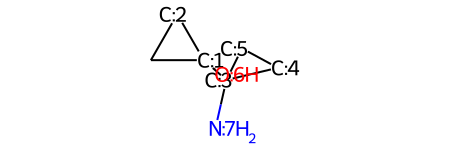

In [4]:
from rdkit.Chem.Lipinski import NumRotatableBonds, NHOHCount
test = Chem.MolFromMolFile('Resources/funky_single.mol')
print(NumRotatableBonds(test))
print(NHOHCount(test))
label(test)

6


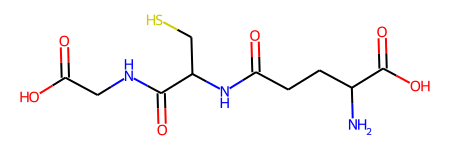

In [5]:
test2 = Chem.MolFromSmiles('C(CC(=O)NC(CS)C(=O)NCC(=O)O)C(C(=O)O)N')
print(NHOHCount(test2))
test2

In [6]:
def _diagonalize(A):
    eigenvalues_of_A, eigenvectors_of_A = np.linalg.eig(A)
    B = eigenvectors_of_A[:,abs(eigenvalues_of_A).argsort()]   
    diagonal_matrix= np.dot(np.linalg.inv(B), np.dot(A, B))
    return diagonal_matrix

In [7]:
Chem.GetDistanceMatrix(test)

array([[0., 1., 1., 2., 3., 3., 2., 3.],
       [1., 0., 1., 1., 2., 2., 1., 2.],
       [1., 1., 0., 2., 3., 3., 2., 3.],
       [2., 1., 2., 0., 1., 1., 2., 1.],
       [3., 2., 3., 1., 0., 1., 3., 2.],
       [3., 2., 3., 1., 1., 0., 3., 2.],
       [2., 1., 2., 2., 3., 3., 0., 3.],
       [3., 2., 3., 1., 2., 2., 3., 0.]])

In [8]:
def _alignment_indexes(mol, reactive_atoms, debug=True):
    '''
    Return the indexes to align the molecule to, given a list of
    atoms that should be reacting. List is composed by reactive atoms
    plus adjacent atoms.
    :param mol: rdkit Mol class molecule object
    :param reactive atoms: int or list of ints

    '''
    matrix = Chem.GetAdjacencyMatrix(mol)
    graph = nx.from_numpy_matrix(matrix)

    if type(reactive_atoms) is int:
        indexes = list([(a, b) for a, b in graph.adjacency()][reactive_atoms][1].keys())
        indexes.append(reactive_atoms)
        if debug: print('DEBUG--> Alignment indexes are', indexes)
        return indexes

    elif len(reactive_atoms) > 1:
        indexes = set()
        for atom in reactive_atoms:
            indexes |= set(list([(a, b) for a, b in graph.adjacency()][atom][1].keys()))
            indexes.add(atom)
        if debug: print('DEBUG--> Alignment indexes are', list(indexes))
        return list(indexes)


In [9]:
import networkx as nx
mol = Chem.MolFromMolFile('Resources/funky_single.mol')
reactive_atoms = [6, 7]
# mol = Chem.MolFromMolFile('Resources/CFClBrI.mol')
# reactive_atoms = 1
Chem.AddHs(mol)
# for atom in mol.GetAtoms():
#     print(atom.GetIdx(), atom.GetSymbol())

matrix = Chem.GetAdjacencyMatrix(mol)
graph = nx.from_numpy_matrix(matrix)
# graph.nodes()
# nx.draw(graph, with_labels=True)

In [13]:
_alignment_indexes(mol, 1)

DEBUG--> Alignment indexes are [0, 2, 3, 6, 1]


[0, 2, 3, 6, 1]

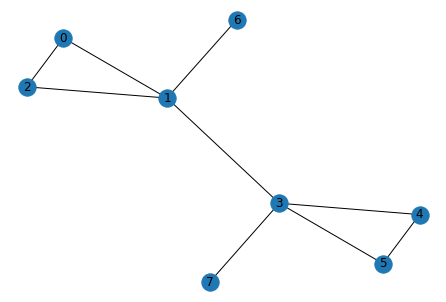

In [11]:
nx.draw(graph, with_labels=True)